# 🔎 In response to this [question][1]
>I have a family of convergence curves [...] <br>
>I would like to train a model that fits reasonably well to all the curves at the same time in my dataset. Is it possible? Do you have any suggestion? It could be a classical econometric model or even machine learning / deep learning models.

[1]:https://ai.stackexchange.com/questions/35774/how-can-i-generalize-a-machine-learning-model-to-multple-curves

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
def tanh(x,s,k):
  return 0.5*k*(np.tanh(s*x-4)+1)

In [66]:
x = np.linspace(0,100,10000)

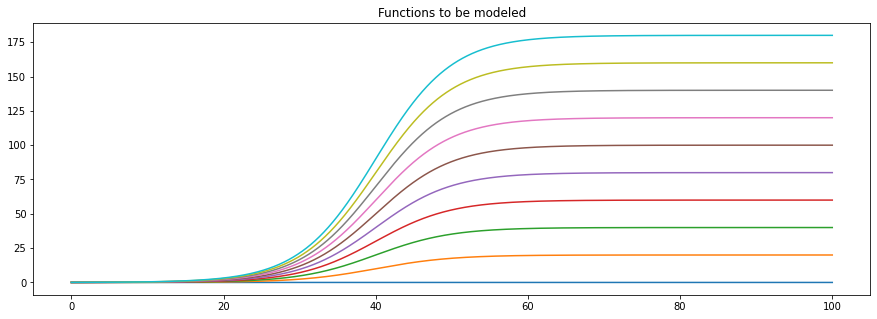

In [89]:
#================== View Data
fig=plt.figure(figsize=(15,5))
ax=plt.subplot()
for k in range(0,200,20):
  _=ax.plot(x,tanh(x,0.1,k))

_=ax.set_title('Functions to be modeled')

In [14]:
#================== Make Data:
X,Y = [],[]
for k in range(0,200,20):
  X.append(x)
  Y.append(tanh(x,0.1,k))

X = np.array(X)
Y = np.array(Y)

In [15]:
#================= Data needs to be Reshaped since we want 10 outputs
print(X.T.shape)
print(Y.T.shape)
X = tf.constant(X.T)
Y = tf.constant(Y.T)

(10000, 10)
(10000, 10)


In [74]:
#====================== Build achitecture:
Input = tf.keras.layers.Input(shape=(10),name='Input')
xi = tf.keras.layers.Dense(units=100,activation='relu',name='D1')(Input)
xi = tf.keras.layers.Dense(units=100,activation='relu',name='D2')(xi)
Output = tf.keras.layers.Dense(units=10,activation='relu',name='Output')(xi) #<<-- 1 unit for each output

model = tf.keras.Model(Input,Output,name='Model1')

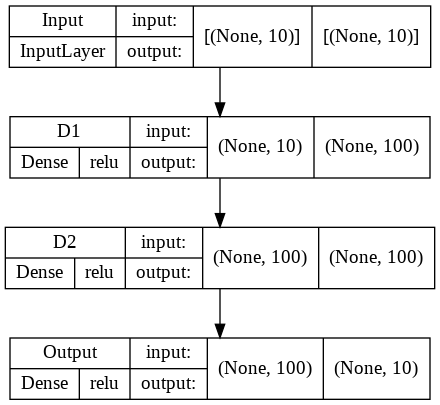

In [82]:
tf.keras.utils.plot_model(model,
                          to_file='model.png',
                          show_shapes=True,
                          show_layer_activations=True)

In [75]:
#===================== Build and compile
tf.random.set_seed(123)
model.compile(loss='mse',
              optimizer='adam',
              metrics='mae')

In [76]:
#====================== Train the Model
history = model.fit(x=X,
                    y=Y,
                    epochs=100)

Epoch 1/100
313/313 [==============================] - 1s 2ms/step - loss: 2071.1338 - mae: 26.7069
Epoch 2/100
313/313 [==============================] - 1s 2ms/step - loss: 898.3092 - mae: 19.3491
Epoch 3/100
313/313 [==============================] - 1s 2ms/step - loss: 893.4568 - mae: 19.2484
Epoch 4/100
313/313 [==============================] - 1s 2ms/step - loss: 888.7028 - mae: 19.1164
Epoch 5/100
313/313 [==============================] - 1s 2ms/step - loss: 886.9375 - mae: 19.0260
Epoch 6/100
313/313 [==============================] - 1s 2ms/step - loss: 649.8268 - mae: 16.9671
Epoch 7/100
313/313 [==============================] - 1s 2ms/step - loss: 361.1679 - mae: 14.3183
Epoch 8/100
313/313 [==============================] - 1s 2ms/step - loss: 356.6425 - mae: 14.1887
Epoch 9/100
313/313 [==============================] - 1s 2ms/step - loss: 354.1245 - mae: 14.0544
Epoch 10/100
313/313 [==============================] - 1s 2ms/step - loss: 348.4158 - mae: 13.8290
Epoch 11

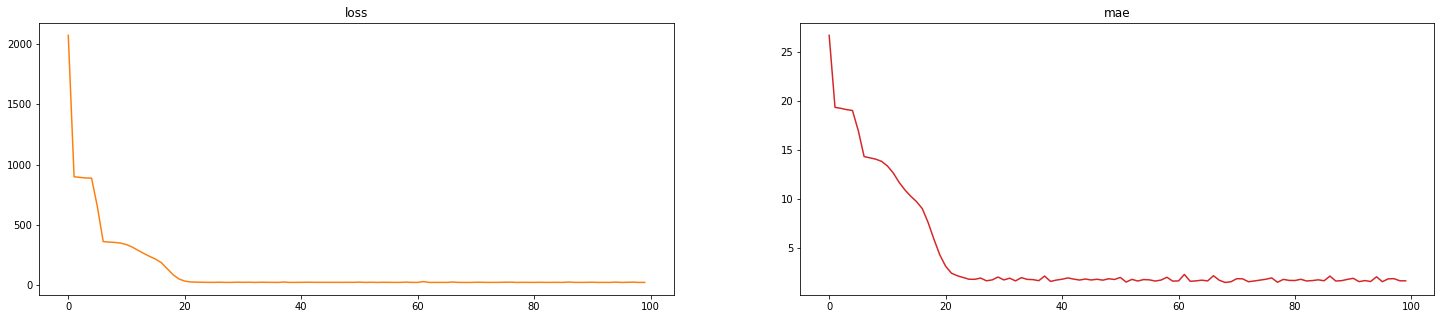

In [86]:
#=============================Show Training History
fig = plt.figure(figsize=(25,5))
ax = plt.subplot(121)
_=ax.plot(history.history['loss'],color='tab:orange')
_=ax.set_title('loss')
ax = plt.subplot(122)
_=ax.plot(history.history['mae'],color='tab:red')
_=ax.set_title('mae')

In [78]:
y_pred = model(X).numpy()
print(y_pred.shape)

(10000, 10)


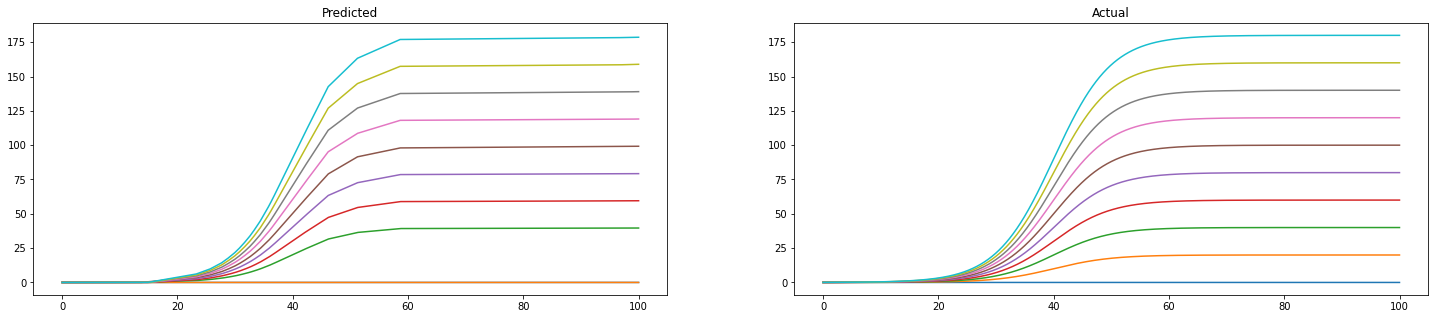

In [85]:
#================== Show Results:
fig = plt.figure(figsize=(25,5))
ax = plt.subplot(121)
_=ax.plot(X,y_pred)
_=ax.set_title('Predicted')
ax = plt.subplot(122,sharey=ax)

for k in range(0,200,20):
  _=ax.plot(x,tanh(x,0.1,k))

_=ax.set_title('Actual')